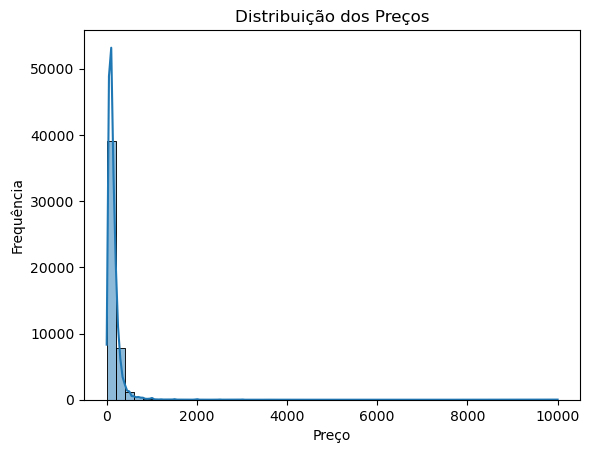

MSE: 48169.196534798495


['modelo_preco.pkl']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Carregar dados
data = pd.read_csv('C://Users//elisa//OneDrive//Área de Trabalho//teste_indicium_precificacao.csv')

# EDA simplificada
# Exemplo: Distribuição dos preços
sns.histplot(data['price'], bins=50, kde=True)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços')
plt.show()

# Tratamento de valores ausentes
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(0)

# Preparação dos dados
features = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']
X = data[features]
y = data['price']

# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Salvando o modelo
joblib.dump(model, 'modelo_preco.pkl')

# Para carregar o modelo
# model = joblib.load('modelo_preco.pkl')

In [7]:
data = pd.read_csv(r'C://Users//elisa//OneDrive//Área de Trabalho//teste_indicium_precificacao.csv')

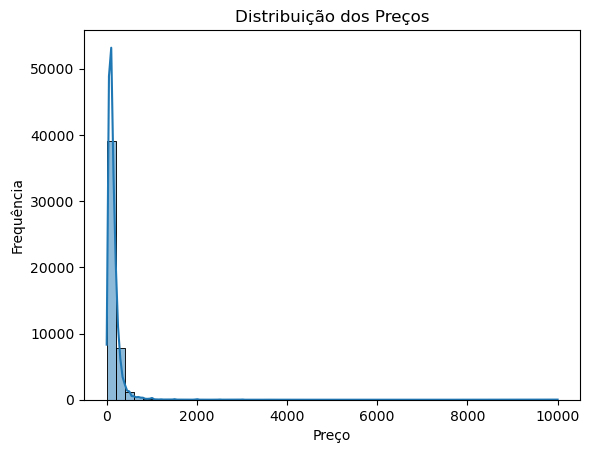

In [8]:
# EDA simplificada
# Exemplo: Distribuição dos preços
sns.histplot(data['price'], bins=50, kde=True)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços')
plt.show()


In [10]:
# Tratamento de valores ausentes
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(0)


In [11]:
# Preparação dos dados
features = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']
X = data[features]
y = data['price']

In [12]:
# Divisão em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 48169.196534798495


In [15]:
# Salvando o modelo
joblib.dump(model, 'modelo_preco.pkl')


['modelo_preco.pkl']

In [16]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [18]:
# Carregar os dados
# Substitua 'seu_caminho_aqui' pelo caminho do seu arquivo
data = pd.read_csv('C://Users//elisa//OneDrive//Área de Trabalho//teste_indicium_precificacao.csv')

In [19]:
# EDA básica
print(data.head())
print(data.describe())


     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150   

In [20]:
# Verificar valores ausentes
print(data.isnull().sum())


id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


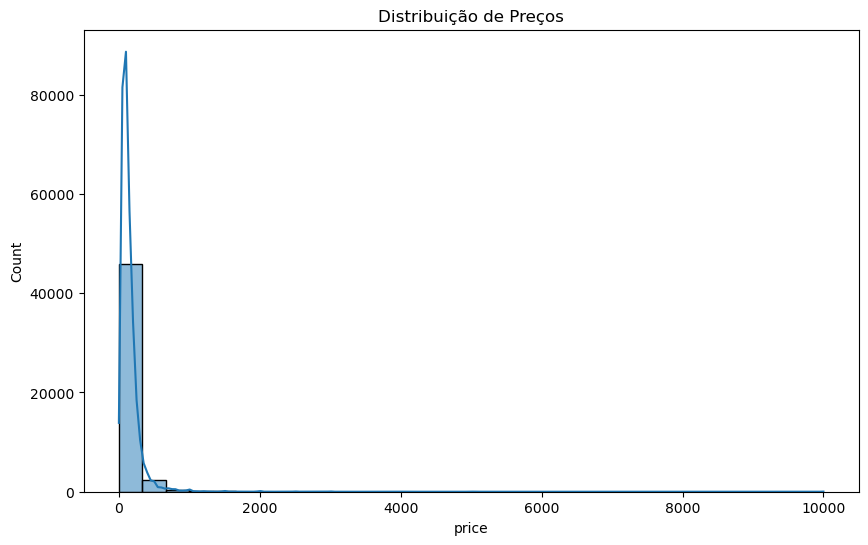

In [21]:
# Visualização da distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribuição de Preços')
plt.show()

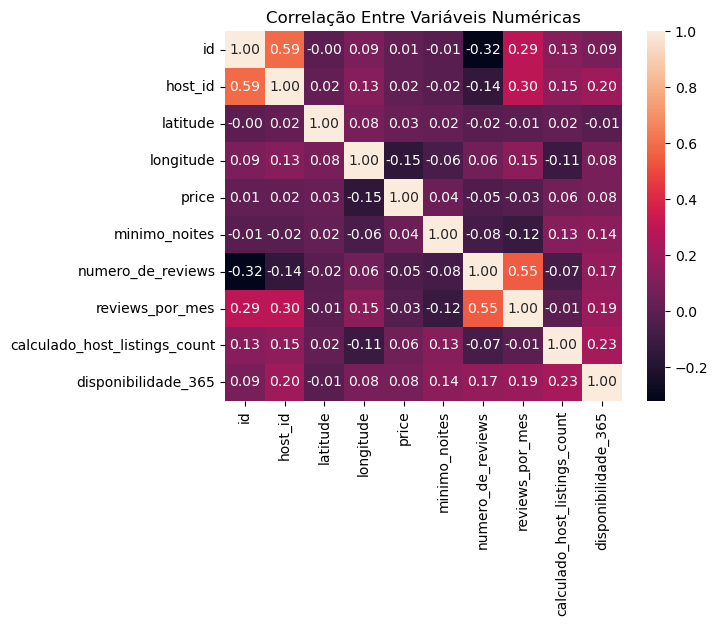

In [23]:
# Selecionar apenas colunas numéricas para calcular a correlação
corr_data = data.select_dtypes(include=[np.number])
sns.heatmap(corr_data.corr(), annot=True, fmt='.2f')
plt.title('Correlação Entre Variáveis Numéricas')
plt.show()

In [24]:
# Pré-processamento e preparação dos dados
# Aqui você pode adicionar ou remover etapas conforme necessário

# Tratamento de valores ausentes
# Exemplo: Preenchendo valores ausentes com a média ou mediana
data['reviews_por_mes'] = data['reviews_por_mes'].fillna(data['reviews_por_mes'].median())


In [25]:
# Divisão dos dados em características e alvo
X = data[['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']]
y = data['price']

In [26]:
# Divisão dos dados em características e alvo
X = data[['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']]
y = data['price']

In [27]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Construção do modelo
# Utilizando um modelo linear como exemplo

# Pipeline de pré-processamento para transformações numéricas
numeric_features = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'disponibilidade_365']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [29]:
# Combinando transformações numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])


In [30]:
# Pipeline do modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LinearRegression())])


In [31]:
# Treinamento do modelo
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimo_noites',
                                                   'numero_de_reviews',
                                                   'reviews_por_mes',
                                                   'disponibilidade_365'])])),
                ('classifier', LinearRegression())])

In [32]:
# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 48171.08164548659


In [34]:
from joblib import dump

# Avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


MSE: 48171.08164548659


In [35]:
# Salvando o modelo em um arquivo .pkl
dump(model, 'modelo_previsao_preco.pkl')

['modelo_previsao_preco.pkl']